# OFFICIAL SUMMARY NOTEBOOK

## Abstract

In this project, we scraped 11k property rent listings from domain.com.au (~6k after preprocessing) and, combined with API queried POI data, tried to answer the 3 fundamental questions. We performed statistical tests on the scraped data combined with external data such as crime rate and income to determine relevant features to be used in our model. We used POI data as an insight into what makes certain properties valuable, but they provide no predictive value since their numbers do not fluctuate much over time.

We fit linear models to the dataset, and used correlation metrics to determine useful features. Unfortunately, only income was found to have any correlation with rent price, which resulted in our model not being very accurate. However, the model still was able to show us a general trend for the future, which still allowed us to answer the question of predictive growth.

For matters of livability, we used POI data and created a metric based on external reports of what Victorians consider to be signs that a place is livable. For affordability, we used income data and rent prices in each SA2 area to obtain an estimated percentage of salary to be paid for rent. From external reports, we found that most Australians are only willing to pay up to 30% of their salary on rent, and thus we reasoned that anything below that threshold for each SA2 area is considered to be affordable.

## How to navigate the notebook

Please run the the code cells under 'Preliminary code' in the next section, which runs the skeleton notebook we've compiled with all the variables required to demonstrate our results and findings. Please hide the cells to avoid overflow of output. It may take a while to run; thank you for your patience.

Once that is done, please continue to the 'Analysis and Presentation of findings' section, where we will walk you through the internal, external feature analysis and modelling, as well as our forecasts and key findings. 

(Please run code cells where necessary to view specific results and visuals)

## Preliminary Code

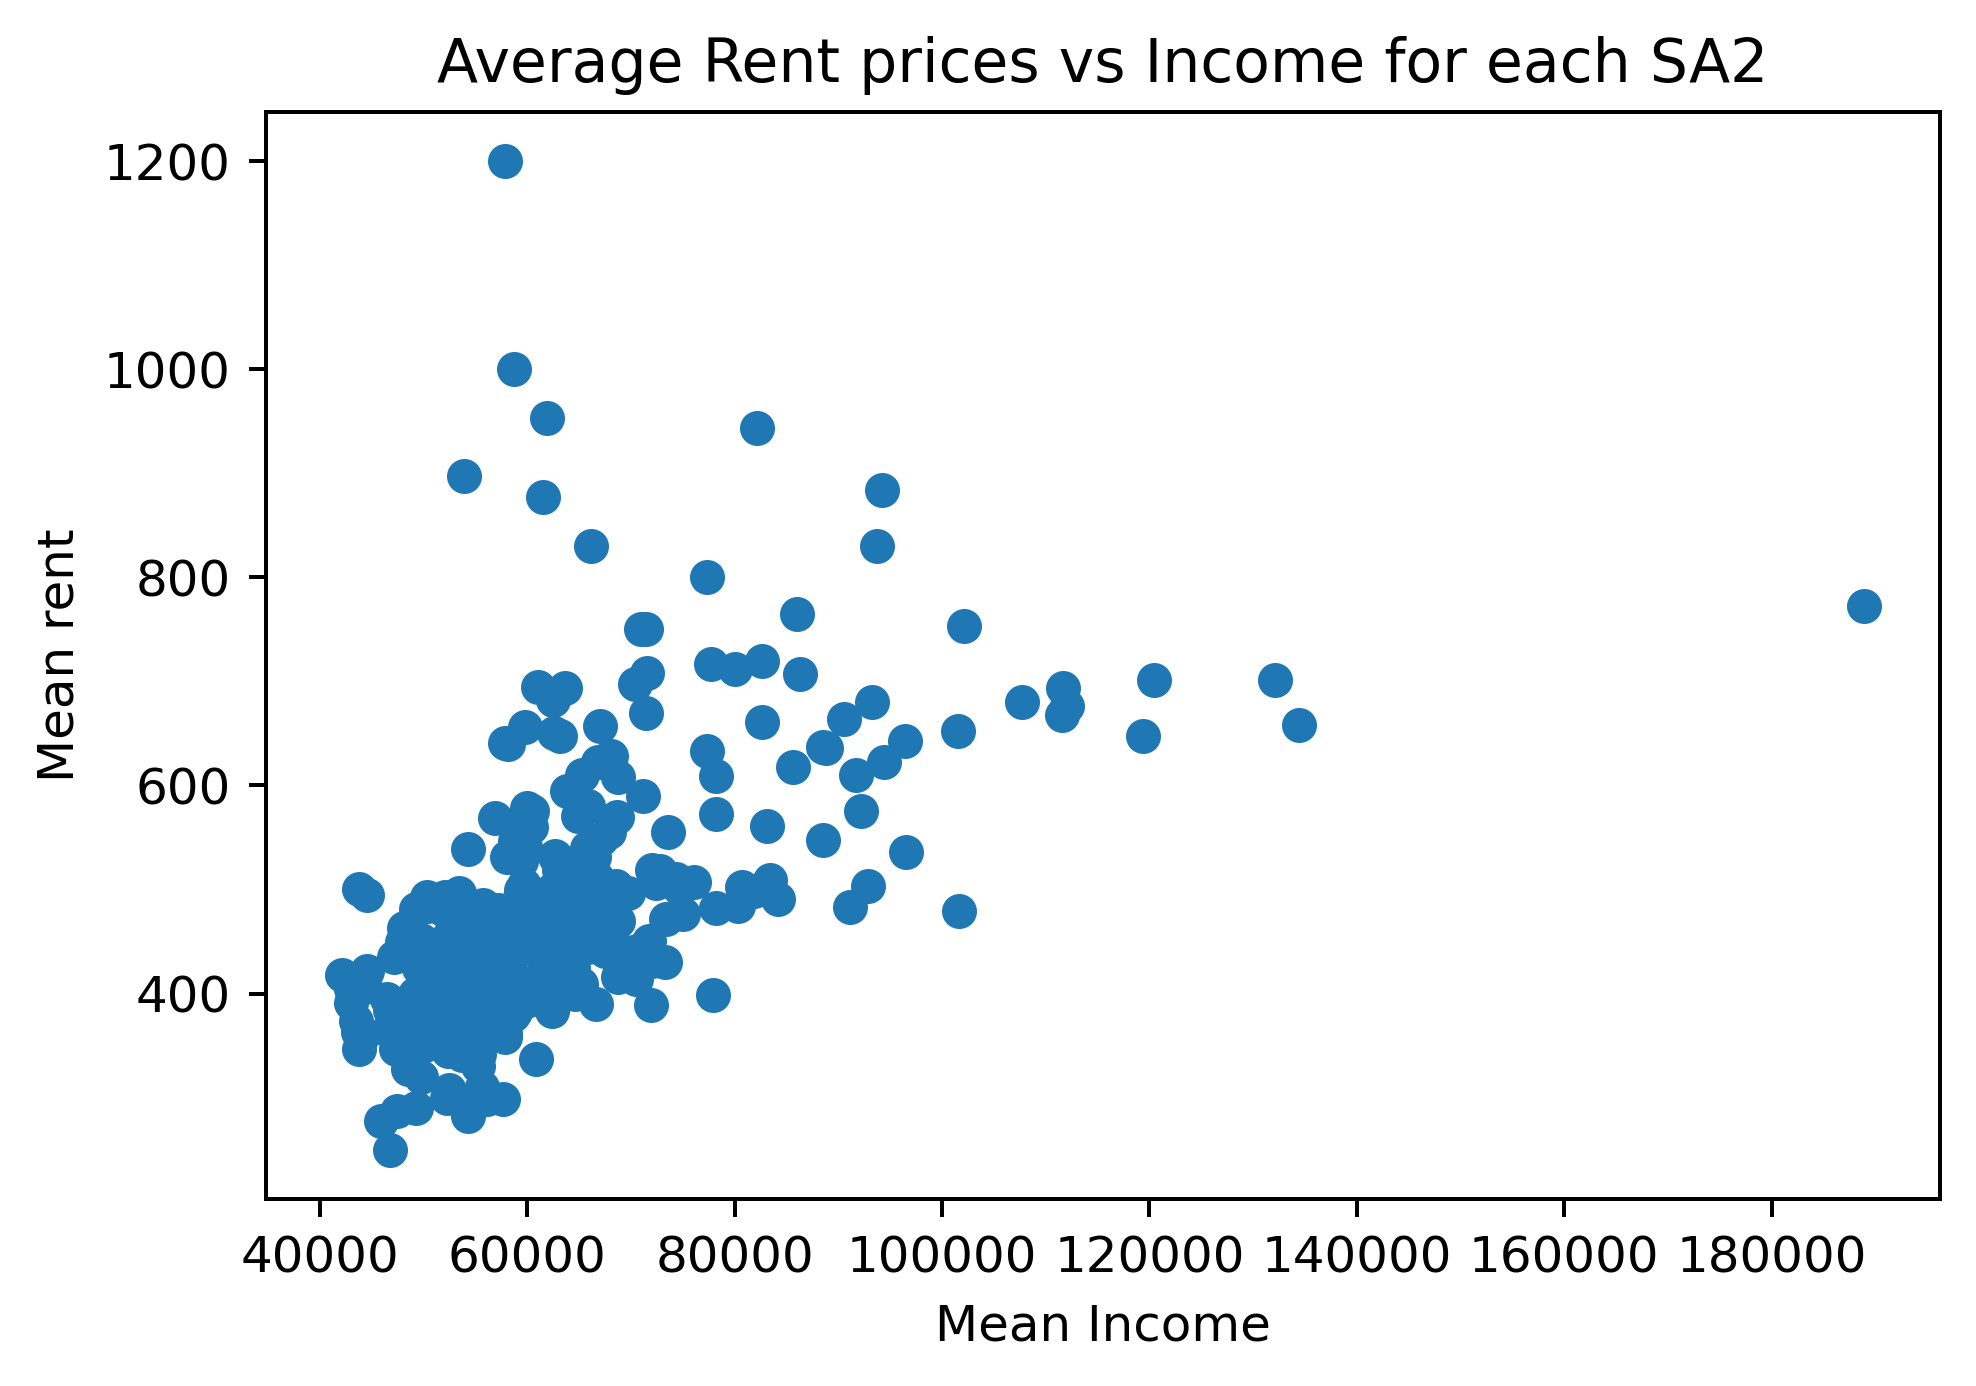

/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.660e+07, tolerance: 6.900e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.643e+07, tolerance: 6.863e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

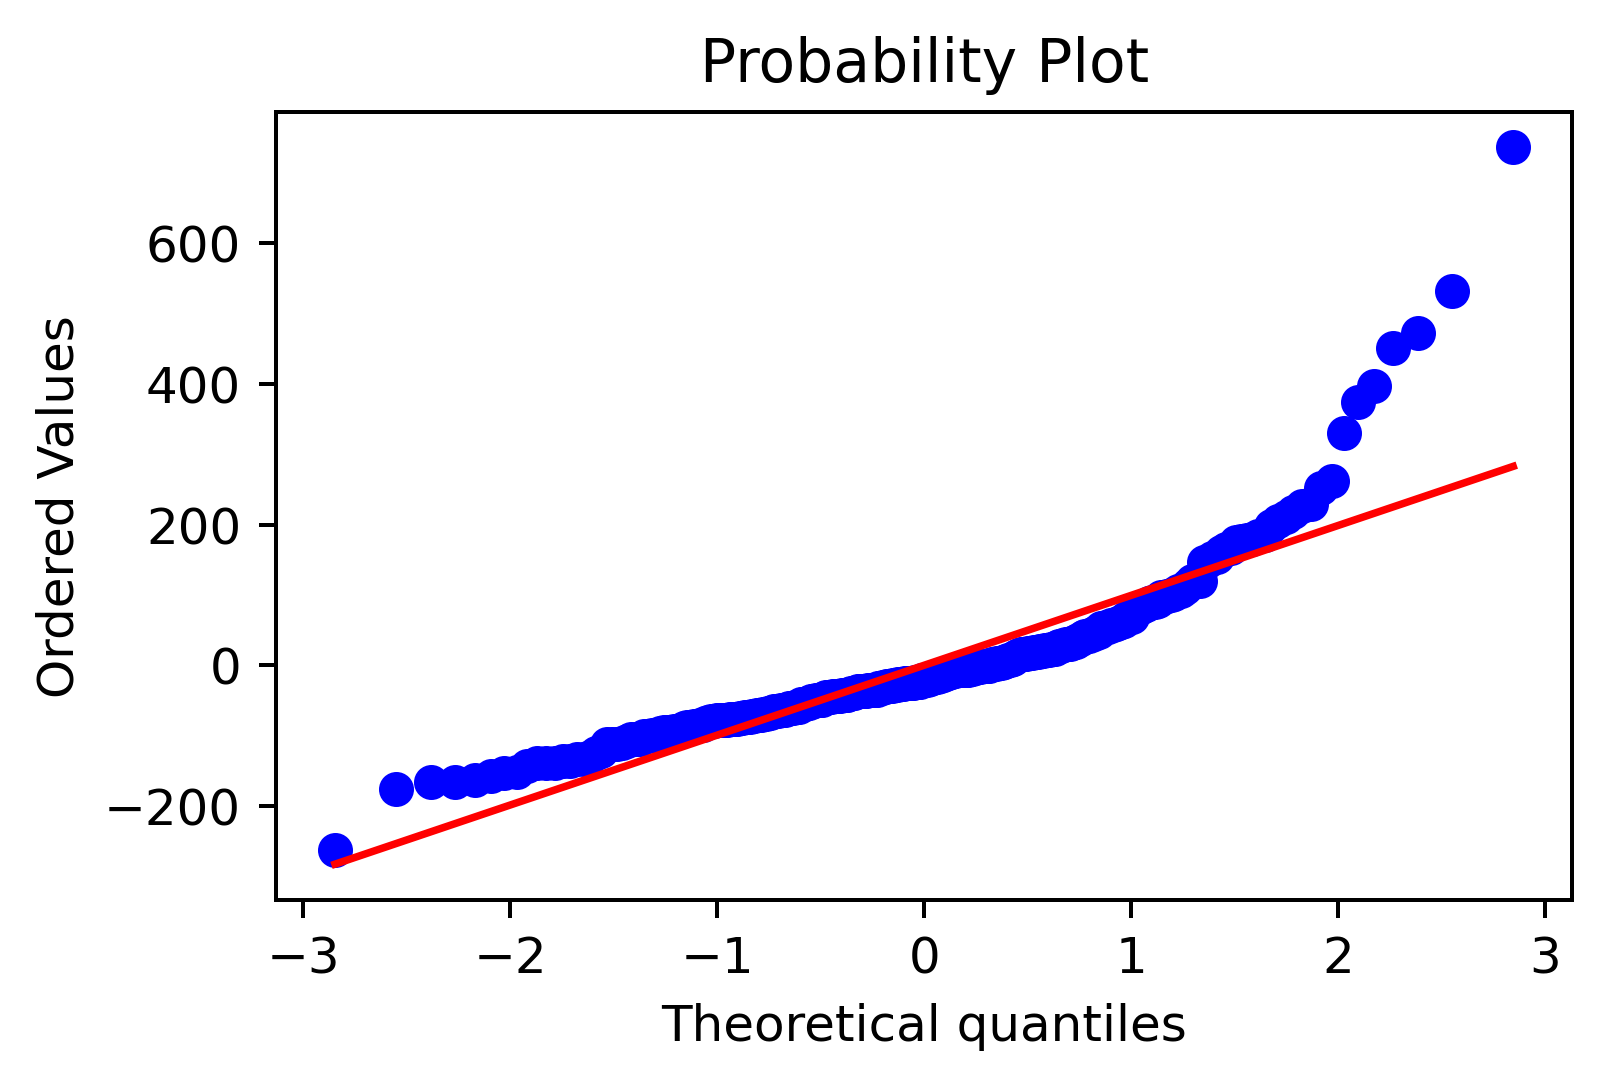

/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/lucyliu/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)
/Users/luc

In [2]:
# import packages
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
%run Summary_notebook_skeleton.ipynb

## Analysis and Presentation of findings

### Property Internal features analysis

In this Section we will be examining the correlation of property internal features, such as property type, number of beds/baths/parking to the rental price of the properties. Relevant features will be selected for modelling in the next stage

Please run the cell to view the matrix that shows the pearson's correlation coefficients between the response variables and the numerical internal variables we investigated (scraped from the original listing)

In [3]:
# correlation matrix output
corr.style.background_gradient(cmap='coolwarm')

,rent cost,Number of bedrooms,Number of bathrooms,Number of parking,under 20 (%),20 - 39 (%),40 - 59 (%),60 +(%)
cost_text,1.000000,0.320863,0.424150,0.166420,-0.069596,-0.015882,0.047522,0.054644
beds,0.320863,1.000000,0.555679,0.498012,0.437816,-0.392116,0.167035,0.189110
baths,0.424150,0.555679,1.000000,0.348175,0.212736,-0.135217,0.073144,0.011129
parking,0.166420,0.498012,0.348175,1.000000,0.345164,-0.354583,0.194312,0.186673
under 20 (%),-0.069596,0.437816,0.212736,0.345164,1.000000,-0.687136,0.488667,0.051793
20 - 39 (%),-0.015882,-0.392116,-0.135217,-0.354583,-0.687136,1.000000,-0.629799,-0.699556
40 - 59 (%),0.047522,0.167035,0.073144,0.194312,0.488667,-0.629799,1.000000,0.099178
60 +(%),0.054644,0.189110,0.011129,0.186673,0.051793,-0.699556,0.099178,1.000000


The output shows that there is weak correlation between neighbourhood demographics (last 4 columns, showing percentage of people from an age grooup within the property's neighbourhood) and rental prices. The number of parking in each property is moderately correlated to rent prices however we consider this to be weak (<0.2). The number of bedrooms and bathrooms are both quite strongly correlated with the rent cost, but are more strongly correlated with eachother. Hence we will choose the number of bathrooms as the variable to be modelled and investigated further, as that is the most strongly correlated variable with rent cost

Pearson's correlation cannot be used for categorical variables (we have two, property type and whether the property is shared or not as a boolean). Hence we will fit a simple linear model with the number of bathrooms and these two variables against rent price to allow further investigation. Please run the below cell for a summary of this model

In [4]:
fit_OLS.summary() # model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cost_text   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sun, 16 Oct 2022   Prob (F-statistic):          5.41e-290
Time:                        17:49:50   Log-Likelihood:                -45628.
No. Observations:                6583   AIC:                         9.128e+04
Df Residuals:                    6570   BIC:                         9.137e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                        436.2214    111.535      3.911      0.000     217.577     654.866
share_flag[T.1]                                  -98.9554     28.306     -3.496      0.000    -154.444     -43.467
property_type[T.Apartment / Unit / Flat]        -200.3164    111.110     -1.803      0.071    -418.129      17.496
property_type[T.Duplex]                         -344.3286    207.486     -1.660      0.097    -751.068      62.411
property_type[T.House]                          -220.8326    111.023     -1.989      0.047    -438.474      -3.191
property_type[T.New Apartments / Off the Plan]  -261.5250    207.475     -1.261      0.208    -668.243     145.193
property_type[T.Rural]                           166.7071    271.604      0.614      0.539    -365.725     699.140
property_type[T.Semi-Detached]                    -0.9357    150.209     -0.006      0.995    -295.394     293.522
property_type[T.Studio]                         -368.7591    113.854     -3.239      0.001    -591.950    -145.568
property_type[T.Terrace]                          -7.9102    145.264     -0.054      0.957    -292.675     276.854
property_type[T.Townhouse]                      -233.6338    111.299     -2.099      0.036    -451.816     -15.451
property_type[T.Villa]                          -242.0804    124.737     -1.941      0.052    -486.606       2.446
baths                                            198.5357      5.481     36.223      0.000     187.791     209.280
==============================================================================
Omnibus:                     7612.628   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1266862.916
Skew:                           5.873   Prob(JB):                         0.00
Kurtosis:                      69.938   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results here indicate that the predictor variables are able to explain around 19% of the variation in rent prices. We will also conduct an ANOVA test for statistical significance. Please run the next cell to view the test results

In [5]:
anova_table # anova table for model

,df,sum_sq,mean_sq,F,PR(>F)
share_flag,1.0,1.300651e+06,1.300651e+06,21.158082,4.308443e-06
property_type,10.0,1.296873e+07,1.296873e+06,21.096616,3.845590e-39
baths,1.0,8.065802e+07,8.065802e+07,1312.087931,4.147619e-262
Residual,6570.0,4.038778e+08,6.147303e+04,NaN,NaN


The p-values of all three variables indicate that they are significant at 0.05 level for predicting rent prices, however the R^2 value computed previously indicate that on their own, these selected internal features are too simplistic to explain rent prices well, which could fluctuate due to a variety of complex factors we have not considered here

Hence in **conclusion**, in this section we find the **most significant internal features** to determining rental prices to be: 
    <br>1. Whether or not the property is shared 
    <br>2. Property type
    <br>3. Number of bathrooms within the property

### Property External features analysis: Points of Interest

In this section, we will focus on the findings from the points of interest data obtained from OpenRouteServices API. We collected POIs within 5km of each property, as well as their distance and travel time to the CBD. A sample of the collected dataset is shown below.

In [6]:
df_full.head(5)

,coordinates,distance,duration,pitch,water,school,swimming_pool,parking,social_facility,fuel,...,volcano,garden_furniture,swimming_area,heliport,summer_camp,brewing_supplies,perfumery,pillory,fort,cost
0,"[-36.253557, 144.944557]",219148.5,10568.7,12.0,16.0,2.0,8.0,6.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.000000
1,"[-36.554159, 146.7208003]",292009.2,12243.3,47.0,23.0,3.0,19.0,16.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.923077
2,"[-36.5530096, 146.7188613]",292171.1,12257.9,47.0,21.0,3.0,18.0,16.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.384615
3,"[-36.5380049, 145.9927626]",211239.3,9285.7,7.0,9.0,3.0,1.0,21.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000
4,"[-36.5424309, 145.9979175]",210269.4,9193.0,5.0,15.0,3.0,1.0,21.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.000000


We wish to find out which features most impact the rent prices of a property, and later on we will attempt to answer the question of what makes suburbs livable and what are the most livable suburbs according to our metrics. 

First, we will attempt to fit an OLS regression model on the dataset with cost being the response and everything else except the coordinates being the predictors. 

In [7]:
# summary of OLS results
summary, anova = get_stats()
summary.tables[0]

Dep. Variable:,cost,R-squared:,0.225
Model:,OLS,Adj. R-squared:,0.188
Method:,Least Squares,F-statistic:,6.115
Date:,"Thu, 13 Oct 2022",Prob (F-statistic):,6.39e-167
Time:,08:41:03,Log-Likelihood:,-35964.
No. Observations:,5975,AIC:,7.247e+04
Df Residuals:,5703,BIC:,7.429e+04
Df Model:,271,,
Covariance Type:,nonrobust,,


We see that the OLS model only explains about 22% of the variation in the data. We can still attempt to gain insight by performing an ANOVA on the predictors, and ranking the p-values to obtain a list of what our model considers the most significant features.

In [8]:
# top features sorted by p values
top_features = anova.sort_values('PR(>F)').head(20)
top_features.iloc[:12,:]

,df,sum_sq,mean_sq,F,PR(>F)
distance,1.0,2.089724e+06,2.089724e+06,201.478113,5.752883e-45
motel,1.0,1.146735e+06,1.146735e+06,110.560981,1.265279e-25
school,1.0,5.760066e+05,5.760066e+05,55.534953,1.055174e-13
supermarket,1.0,5.635985e+05,5.635985e+05,54.338638,1.928180e-13
beach,1.0,5.121318e+05,5.121318e+05,49.376544,2.359473e-12
pub,1.0,5.075629e+05,5.075629e+05,48.936034,2.947884e-12
restaurant,1.0,4.275929e+05,4.275929e+05,41.225830,1.465778e-10
pitch,1.0,4.227708e+05,4.227708e+05,40.760910,1.856272e-10
police,1.0,4.003858e+05,4.003858e+05,38.602690,5.562299e-10
post_office,1.0,3.940225e+05,3.940225e+05,37.989184,7.601178e-10


### Most Liveable and Affordable suburbs

Liveability and affordability are what people value the most when choosing a home. In this section we will be investigating the most liveable and affordable suburbs according to our chosen metrics

#### 1. Liveability
According to a PwC report, Victorians now prioritise accessibility to things like supermarkets, playgrounds, and cafes to be measures of liveability. Thus, we reflected the sentiment by taking the means for the supermarket, pitch, and cafe features for each SA2 area, and scaled them by dividing by their maximum. Then we summed the scaled metrics to create our liveability metric. We thus obtain the following top 10 most livable suburbs.

Report: https://www.pwc.com.au/important-problems/future-victoria/future-victoria-2021.pdf

In [9]:
gb_live # most liveable suburbs 

,supermarket,pitch,cafe,supermarket_scaled,pitch_scaled,cafe_scaled,liveability
sa2_code,,,,,,,
Rutherglen,26.00,98.00,190.00,1.00,0.37,1.00,2.37
Montrose,12.50,265.50,70.50,0.48,1.00,0.37,1.85
Yarram,15.00,219.00,71.00,0.58,0.82,0.37,1.78
Castlemaine,11.25,264.50,65.50,0.43,1.00,0.34,1.77
Alfredton,21.00,74.42,128.84,0.81,0.28,0.68,1.77
East Bendigo - Kennington,20.43,155.86,74.71,0.79,0.59,0.39,1.77
Ballarat,13.71,216.36,70.57,0.53,0.81,0.37,1.71
Seymour,18.00,200.00,10.00,0.69,0.75,0.05,1.50
Daylesford,13.33,141.17,67.50,0.51,0.53,0.36,1.40


### 2. Affordability
The Australian Institute of Health and Welfare measures affordability as the ratio between rental price and household income. Details can be viewed in the below source:
https://www.aihw.gov.au/reports/australias-welfare/housing-affordability 

Most Australians are willing to spend no more than 30% of their income on rent, according to source below:
https://www.google.com/url?q=https://soho.com.au/articles/7-things-that-influence-rental-prices-in-australia&sa=D&source=docs&ust=1665481565249445&usg=AOvVaw2oZCT3O6h1X3IyCU3FOELT 

Hence we define a suburb to be affordable if the average ratio of rent against household income for all properties in the suburb is no more than 0.3. We have computed this ratio for each property and averaged it as a ratio for each individual suburb. The results for the most liveable suburbs we found previously also shows them to be affordable by this definition. Please run the cell below to view the affordability ratios of these suburbs, which you can see are all under 0.3.

In [10]:
# affordability ratios of the most liveable suburbs
average_aff_ratios[average_aff_ratios.index.isin(gb_live.index)].to_frame()

,affordability ratio
SA2 name,
Ballarat,0.099364
Alfredton,0.103023
Seymour,0.120148
Yarram,0.134624
East Bendigo - Kennington,0.135200
Mulgrave,0.136391
Rutherglen,0.136852
Castlemaine,0.179579
Montrose,0.180894


### Property External features analysis: for predictions 

In the last section we were fortunate enough to discover many points of interests that are well correlated to property rental prices, however, as abstract, we are assuming that these points of interests will remain static in the next 3 years and hence have no predictive value. 

In this section we will investigate variables that will change at least annually and see whether or not they have an affect on predictive prices. We will select significant predictors for forecasting purposes

We investigated **3 features**, all in the granularity of SA2: 
<br>1. Crime rates 
<br>2. Population numbers; both total and binned by age group
<br>3. Mean personal annual income

Please run the below code cell to view the Pearson's correlation between individual rent prices and these features

In [11]:
# correlation matrix for external variables vs rent prices
corr_2.style.background_gradient(cmap='coolwarm')

,rent price,Area,Children_population,Early_Working_age_population,Prime_Working_age_population,Mature_Working_age_population,Elderly_population,2021 crime rate,Median $ 2019,Mean $ 2019
rent price,1.000000,-0.053244,-0.098241,-0.058956,-0.033446,0.023290,-0.032278,0.094645,0.217546,0.285389
Area,-0.053244,1.000000,-0.066948,-0.143209,-0.179730,0.018418,-0.122788,-0.051292,-0.149585,-0.117593
Children_population,-0.098241,-0.066948,1.000000,0.461968,0.612009,0.513033,0.763762,-0.449693,-0.075987,-0.191118
Early_Working_age_population,-0.058956,-0.143209,0.461968,1.000000,0.666602,0.358664,0.719141,0.073924,-0.263296,-0.115203
Prime_Working_age_population,-0.033446,-0.179730,0.612009,0.666602,1.000000,0.377268,0.841241,-0.011264,0.090947,-0.020748
Mature_Working_age_population,0.023290,0.018418,0.513033,0.358664,0.377268,1.000000,0.768916,-0.404294,-0.193024,-0.076746
Elderly_population,-0.032278,-0.122788,0.763762,0.719141,0.841241,0.768916,1.000000,-0.269660,-0.107876,-0.085617
2021 crime rate,0.094645,-0.051292,-0.449693,0.073924,-0.011264,-0.404294,-0.269660,1.000000,0.132043,0.209057
Median $ 2019,0.217546,-0.149585,-0.075987,-0.263296,0.090947,-0.193024,-0.107876,0.132043,1.000000,0.838754
Mean $ 2019,0.285389,-0.117593,-0.191118,-0.115203,-0.020748,-0.076746,-0.085617,0.209057,0.838754,1.000000


Only income seems to be moderately correlated with rent prices, but perhaps not enough to be a predictive variable. Individual rent prices of properties can vary significantly due to a variety of internal features (property type, for example as found before), hence it may be more reasonable that mean income is more highly correlated with the mean rental prices in each SA2, we will investigate this next hence

Now in the next matrix, we computed pearson's correlation between the mean rent prices in each SA2 and the other features

In [12]:
corr_3.style.background_gradient(cmap='coolwarm') # matrix of mean rent prices vs features

,rent price,Area,Children_population,Early_Working_age_population,Prime_Working_age_population,Mature_Working_age_population,Elderly_population,2021 crime rate,Median $ 2019,Mean $ 2019
rent price,1.000000,-0.053244,-0.098241,-0.058956,-0.033446,0.023290,-0.032278,0.094645,0.217546,0.285389
Area,-0.053244,1.000000,-0.066948,-0.143209,-0.179730,0.018418,-0.122788,-0.051292,-0.149585,-0.117593
Children_population,-0.098241,-0.066948,1.000000,0.461968,0.612009,0.513033,0.763762,-0.449693,-0.075987,-0.191118
Early_Working_age_population,-0.058956,-0.143209,0.461968,1.000000,0.666602,0.358664,0.719141,0.073924,-0.263296,-0.115203
Prime_Working_age_population,-0.033446,-0.179730,0.612009,0.666602,1.000000,0.377268,0.841241,-0.011264,0.090947,-0.020748
Mature_Working_age_population,0.023290,0.018418,0.513033,0.358664,0.377268,1.000000,0.768916,-0.404294,-0.193024,-0.076746
Elderly_population,-0.032278,-0.122788,0.763762,0.719141,0.841241,0.768916,1.000000,-0.269660,-0.107876,-0.085617
2021 crime rate,0.094645,-0.051292,-0.449693,0.073924,-0.011264,-0.404294,-0.269660,1.000000,0.132043,0.209057
Median $ 2019,0.217546,-0.149585,-0.075987,-0.263296,0.090947,-0.193024,-0.107876,0.132043,1.000000,0.838754
Mean $ 2019,0.285389,-0.117593,-0.191118,-0.115203,-0.020748,-0.076746,-0.085617,0.209057,0.838754,1.000000


As expected, mean income is a good indicator of the mean rental prices in each SA2, hence we will retain this feature for further analysis and potentially modelling and forecasting

### Modelling

The graph of Income against rent (average) for each SA2 below suggests a strong positive linear relationship between the two, although the outliers present may mean that a transformation is necessary. Hence we are going to choose OLS to model the two variables

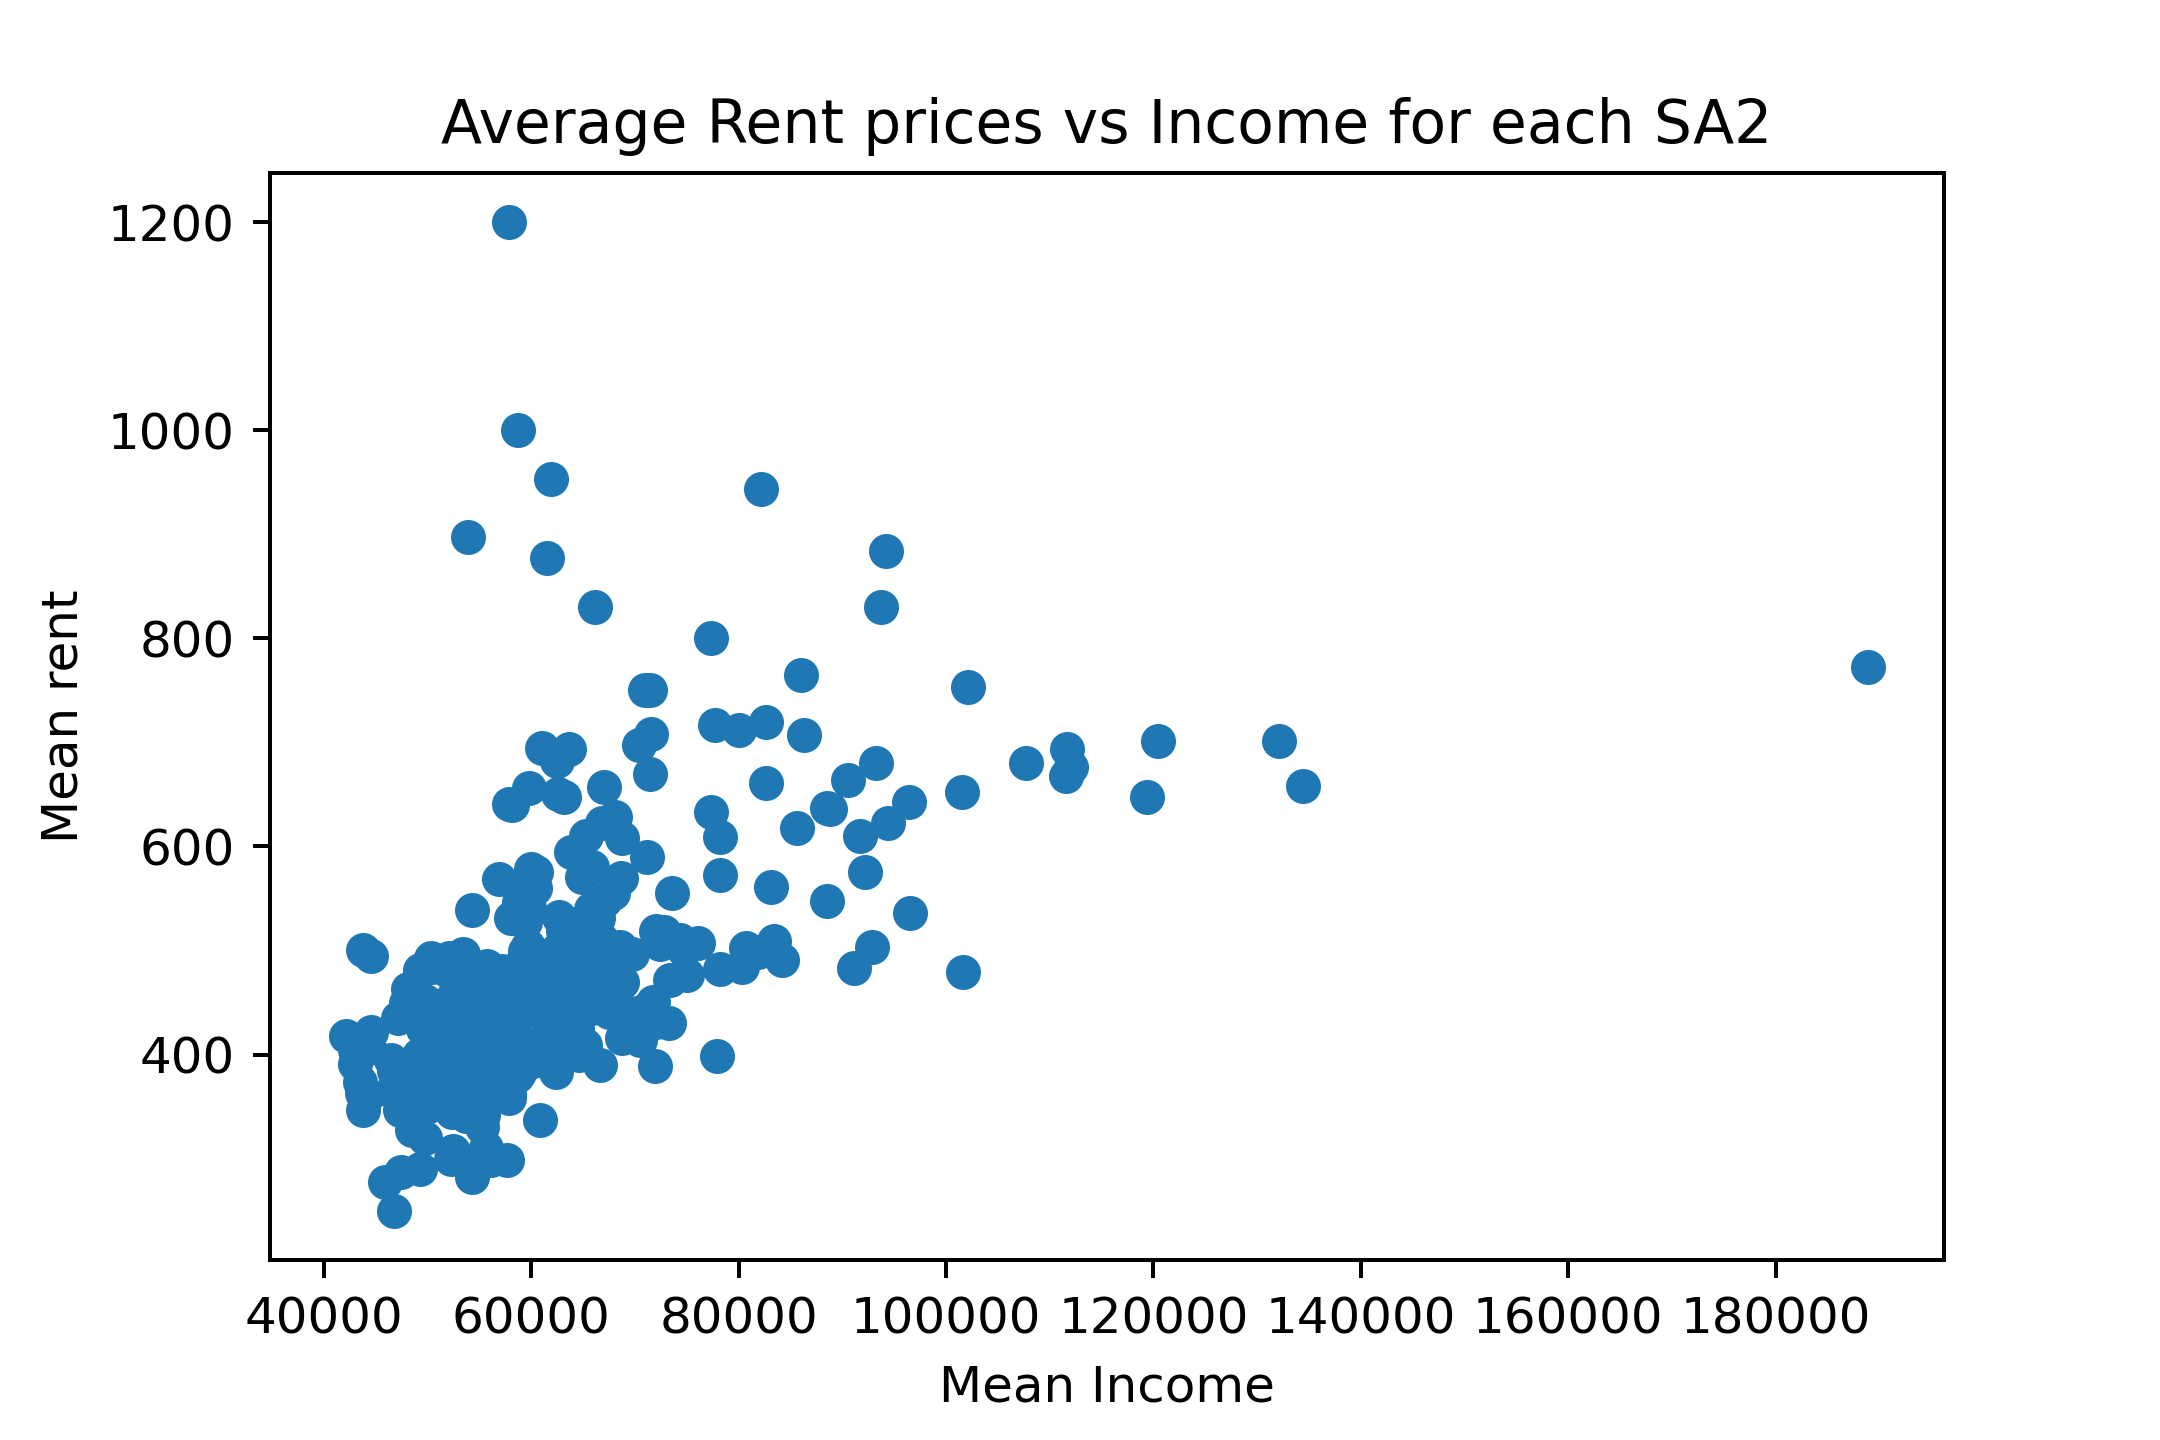

The summary of the model can be viewed by running the cell below: 

In [13]:
# generate a simple linear model
OLS_SA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_price   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     135.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.90e-26
Time:                        08:41:04   Log-Likelihood:                -1918.8
No. Observations:                 314   AIC:                             3842.
Df Residuals:                     312   BIC:                             3849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          211.6077     24.624      8.593      0.000     163.157     260.059
Mean_income_2019     0.0044      0.000     11.644      0.000       0.004       0.005
==============================================================================
Omnibus:                      186.605   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1576.060
Skew:                           2.357   Prob(JB):                         0.00
Kurtosis:                      12.911   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see the R2 value is only around 0.3, however, we can still expect a reasonable representation of future rental prices, as we know that there is a strictly positive correlation between income and rental prices, even if we may not be able to get *exact* predictions, we can still get a gist of potential **growth**

We also made sure to pay close attention to the residuals of the model: 

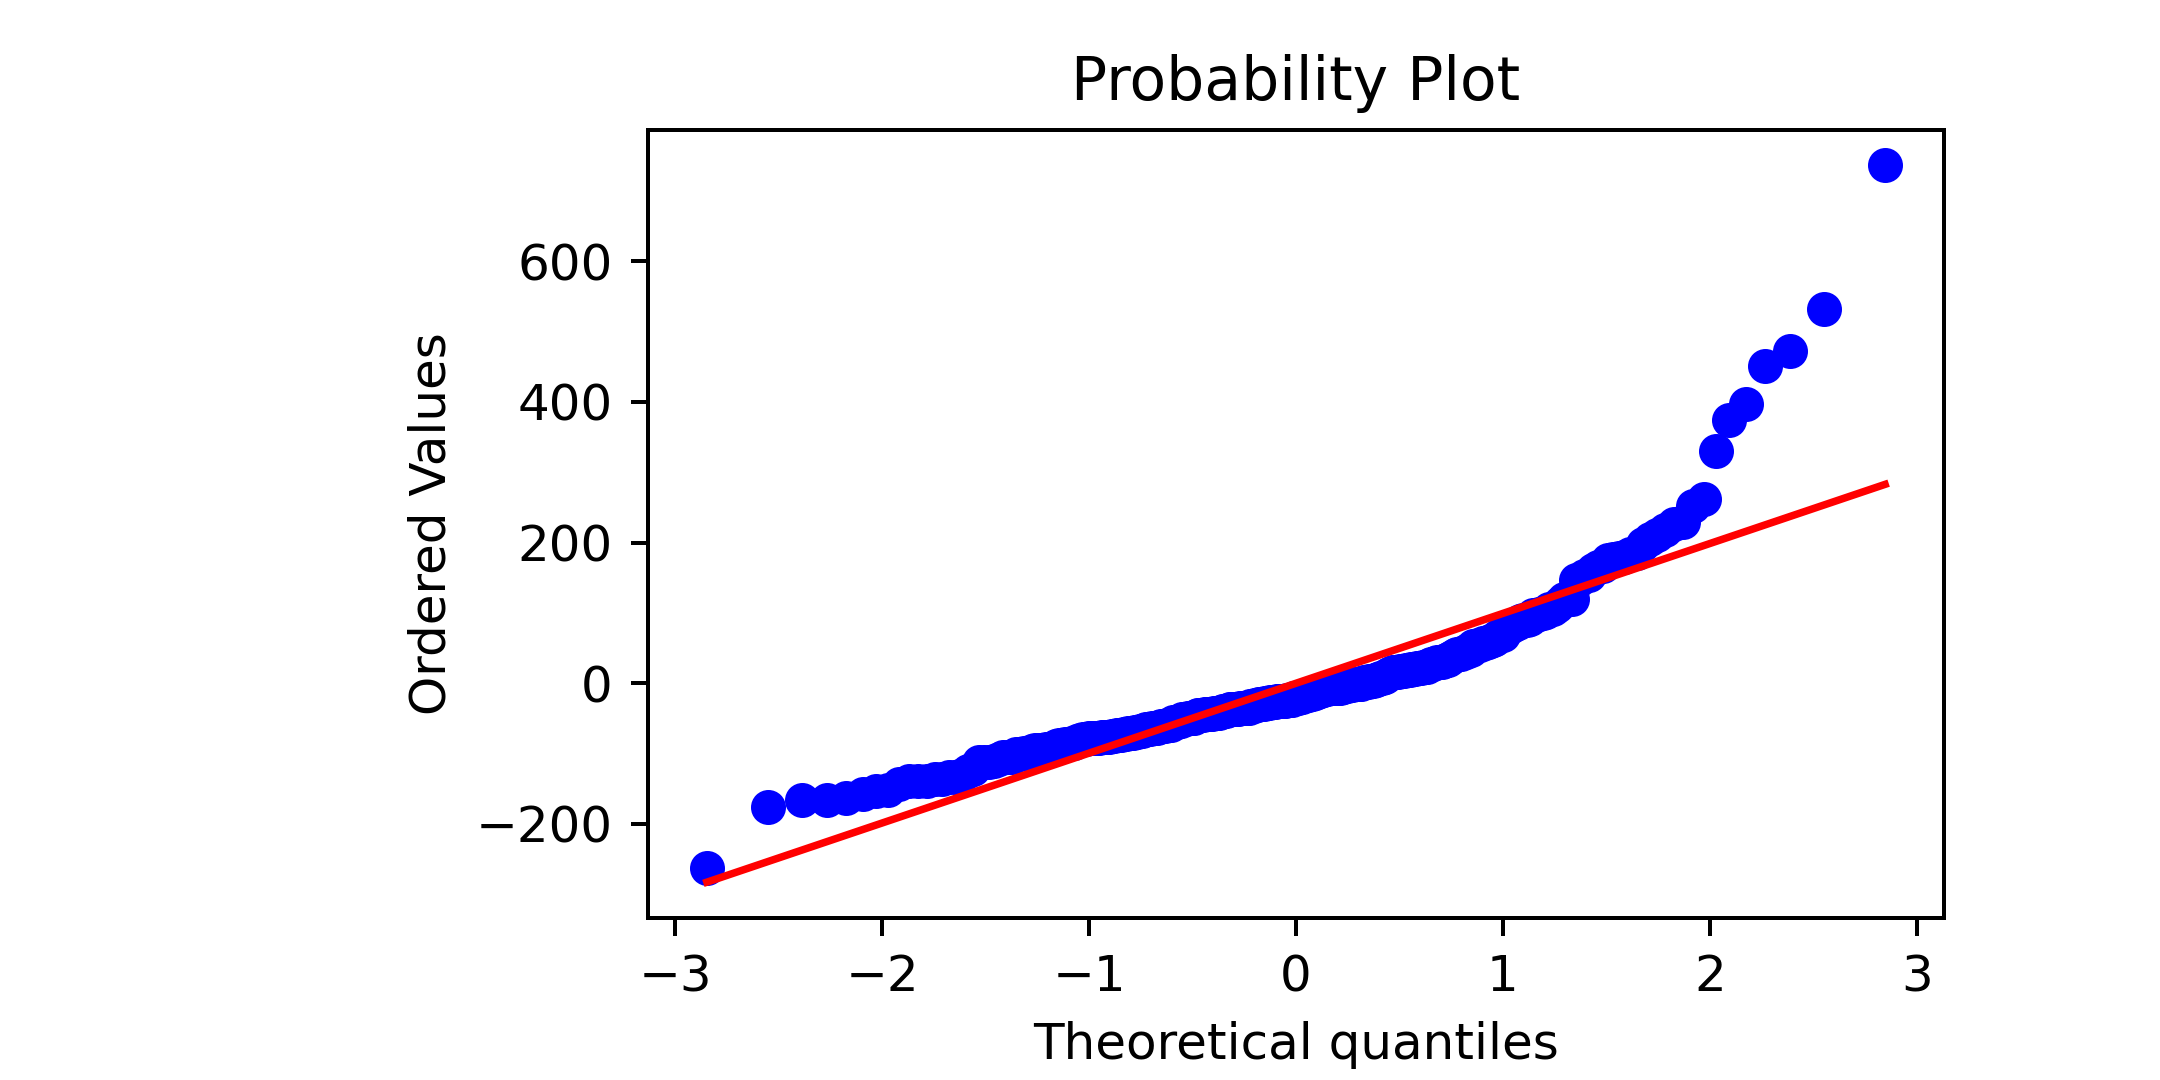

The residuals indicate that a logarithmic transformation on the response variable will be appropriate

In order to test the accuracy of the model, we performed a one-part-out cross validation iteratively across every SA2. We also hypothesized that a negative binomial model with the same two variables may be suitable. The mean and standard deviations of the errors made by the models across all the validation folds can be viewed by running the cell below

In [14]:
# examine the errors -OLS
print('median of OLS errors is', Results_CV['OLS error'].median())
print('sd of OLS errors is', Results_CV['OLS error'].std())
# examine NB errors
print('median of NB errors is', Results_CV['NB error'].median())
print('sd of NB errors is', Results_CV['NB error'].std())

median of OLS errors is 46.68616100932343
sd of OLS errors is 94.4290103157687
median of NB errors is 47.32631547896685
sd of NB errors is 99.46672253765189


As we only have one predictor variable, it is reasonable that OLS performed a lot better as it is more simple. Hence an OLS model with log of rent against income will be what we retain for our forecasts

### Forecasting predictions

Using the ordinary least squares model developed in the last section, we will now output the predicted average rental prices over the next three years (2023-2025), The dataset for income we used were forecasts we created ourselves under the assumption that there is linear annual growth in income, and that this trend is the same from 2015-2019, the available datasets we were able to find

These forecasted income datasets hence do not take into account the most recent events that could have caused deviations from past trends in income growth, such as the COVID-19 pandemic and the approaching recession. Hence our predictions and model do not take into account these factors. 

Further, consistent to our developed model, we will use income data that is three years earlier to output the current year's predictions (eg. predict 2023 using 2020 income data). We acknowledge that this fact, along with several other naive assumptions as key limitations within our methodology.

As mentioned previously, the model we developed lacked precision hence we will create a **representation** of expected growth within each suburb. And we defined high growth rates to be the highest average growth rates across three years. Please view below for the top ten suburbs with highest predicted growth rate in rental prices from 2023-2025

In [15]:
Predictions.iloc[:10,].reset_index(drop = True)

,SA2,2023,2024,2025,2022,Change from 2022 to 2023,Change from 2023 to 2024,Change from 2024 to 2025,total_change,average_change
0,Toorak,1159.115591,1193.153701,1228.414800,772.096774,387.018816,34.038110,35.261099,456.318026,152.106009
1,Yarriambiack,522.720262,547.661305,574.601899,307.500000,215.220262,24.941043,26.940595,267.101899,89.033966
2,Buloke,499.965181,525.093505,552.411275,287.500000,212.465181,25.128324,27.317770,264.911275,88.303758
3,Southern Grampians,521.042137,540.608649,561.412959,310.000000,211.042137,19.566513,20.804310,251.412959,83.804320
4,Malvern East,698.895096,710.691623,722.773863,478.921053,219.974043,11.796528,12.082240,243.852811,81.284270
5,Ballarat,605.394386,620.368158,635.911613,398.928571,206.465814,14.973772,15.543455,236.983041,78.994347
6,South Yarra - West,853.669805,868.643577,883.967085,658.357143,195.312662,14.973772,15.323508,225.609942,75.203314
7,East Melbourne,874.794670,898.736590,923.543052,701.666667,173.128003,23.941920,24.806462,221.876386,73.958795
8,Swan Hill,480.257118,489.001400,498.029653,282.500000,197.757118,8.744282,9.028252,215.529653,71.843218
9,Moyne - East,489.337635,499.053601,509.109722,300.000000,189.337635,9.715966,10.056120,209.109722,69.703241


There seems to be large disparity for predictions across the different years, as seen from the change rates computed, which is why we chose to leverage the average growth rate per year as the metric for comparing growth rates for different suburbs

There is no doubt that our model lacks the complexity required to give accurate rental forecasts, however income is still quite a significant variable, as we have found and on its own is able to provide a representation of future rental growth rates

It is unfortunate that the other external factors we investigated were insignificant, contrary to expectations. This emphasizes the need to drive decisions on data rather than intuition. With a longer timeframe for a future potential project, we are confident that we will be able to investigate more factors, add complexity to our model and forecast precise, accurate rental prices with the pipeline and methodology that we have utilised in this current project.